In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [2]:
# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', as_supervised=True)

def preprocess(image, label):
    image = tf.image.resize(image, [299, 299])  # InceptionV3 expects 299x299 images
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess).cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete8VZNH2/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


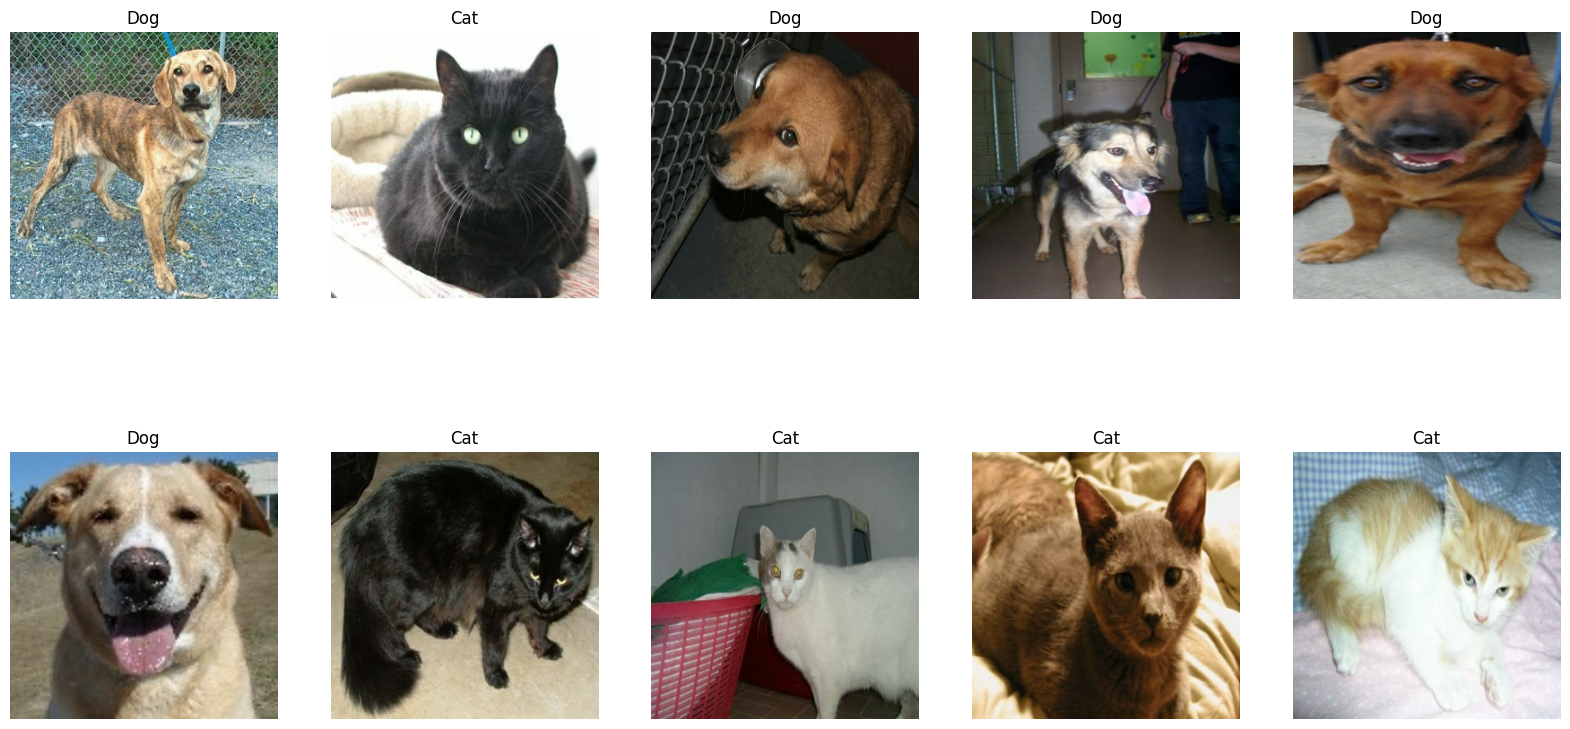

In [3]:
##show some of images with their labels
## your code goes here##

def show_images(dataset, num_images):
    plt.figure(figsize=(20, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.numpy())
        plt.title("Cat" if label.numpy() == 0 else "Dog")
        plt.axis('off')
    plt.show()

show_images(train_dataset.unbatch().take(10), 10)

In [ ]:
# # inception_model =InceptionV3(weights='imagenet', include_top=?, input_shape=(299,299, 3))

# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)  # Dropout to prevent overfitting
# predictions = Dense(1, activation='sigmoid')(x)

# # print(inception_model.summary())
# print(base_model.summary())



import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', as_supervised=True)
print(len(train_dataset))
print(len(test_dataset))
def preprocess(image, label):
    image = tf.image.resize(image, [299, 299])  # InceptionV3 expects 299x299 images
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess).cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Load the base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Set the layers of the base model to be trainable
for layer in base_model.layers:
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

# Make predictions on the test dataset
predictions = model.predict(test_dataset)

# To print out the predictions, convert the dataset to a numpy array
import numpy as np

test_images, test_labels = [], []
for images, labels in test_dataset:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = model.predict(test_images)

print(predictions)


18610
4652
87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activ

In [ ]:
#create your model
#dont forget to freeze the pretrained part
##your code goes here##
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model layers to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Compile the model
##your code goes here##

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
print("Model Summary:")
model.summary()


In [ ]:
#train your model
##your code goes here##

history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

# Unfreeze the base_model layers and fine-tune the entire model with a lower learning rate
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_dataset, validation_data=test_dataset, epochs=10)


In [ ]:
#report the accuracy on your test set
##your code goes here##

# Evaluate the model on the test set
y_true = []
y_pred = []

for image, label in test_dataset:
    y_true.extend(label.numpy())
    y_pred.extend((model.predict(image) > 0.5).astype("int32"))

test_acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
